# Observations and Insights 

###  Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data. Include these observations at the top of notebook.


* There is a mouse (g989) that has it´s timepoint repeated or duplicated, if we make the necessary operations, we can obtain the real number of mice, that is 248.

* We could see that the number of mice per each Drug Regimen is 25, except for Propiva and Stelasyn that have 24. Also we could see that the male gender is the one that predominates in the whole experiment instead of the female gender.

* Obtaining the IQR we can determine that the only drug that have a potential outlier is Infubinol.

* Finally we can see with the two last charts the mice values in weight for Capamulin regimen are proportionals with the tumor volume. On the other hand, the "s185" mouse graph, shows us that the tumor volume decreases as the timepoint progresses.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
#print(mouse_metadata, study_results)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how = 'inner', on = 'Mouse ID')

# Display the data table for preview
combined_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
number_mice = len(combined_data['Mouse ID'].value_counts())
number_mice


249

In [24]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data.loc[combined_data.duplicated(subset = ['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice


array(['g989'], dtype=object)

In [25]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_g989 = combined_data[combined_data['Mouse ID'] == 'g989']
mice_g989


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [26]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_dataframe = combined_data[combined_data['Mouse ID'] != 'g989']
cleaned_dataframe


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [27]:
# Checking the number of mice in the clean DataFrame.
number_mice2 = len(cleaned_dataframe['Mouse ID'].value_counts())
number_mice2


248

## Summary Statistics

In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = cleaned_dataframe.groupby("Drug Regimen")['Tumor Volume (mm3)'].mean()
print(mean)
median = cleaned_dataframe.groupby("Drug Regimen")['Tumor Volume (mm3)'].median()
print(median)
variance = cleaned_dataframe.groupby("Drug Regimen")['Tumor Volume (mm3)'].var()
print(variance)
standard_dev = cleaned_dataframe.groupby("Drug Regimen")['Tumor Volume (mm3)'].std()
print(standard_dev)
SEM = cleaned_dataframe.groupby("Drug Regimen")['Tumor Volume (mm3)'].sem()
print(SEM)

# This method is the most straighforward, creating multiple series and putting them all together at the end.
summary_data = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard deviation": standard_dev, "SEM":SEM})
summary_data


Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Pro

,Mean,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
second_method = cleaned_dataframe.groupby('Drug Regimen').agg(
    Mean = ('Tumor Volume (mm3)', 'mean'),
    Median = ('Tumor Volume (mm3)', 'median'),
    Variance = ('Tumor Volume (mm3)', 'var'),
    Standard_Deviation = ('Tumor Volume (mm3)', 'std'),
    SEM = ('Tumor Volume (mm3)', 'sem'))
print(second_method)


                   Mean     Median   Variance  Standard_Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


## Bar and Pie Charts

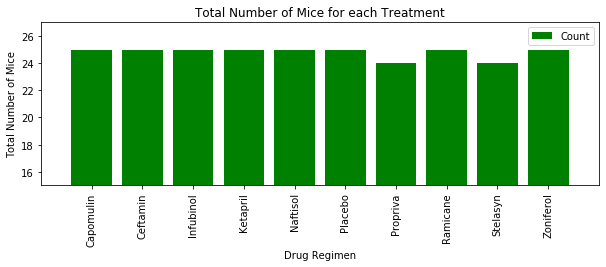

In [30]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

total_mice = cleaned_dataframe.groupby("Drug Regimen")['Mouse ID'].nunique()
#print(total_mice)
total_mice.plot(kind='bar', facecolor ='green', figsize=(10,3), width=0.8,label = 'Count')

# Set x and y limits
x_axis = np.arange(len(total_mice))
plt.xlim(-1, len(x_axis))
plt.ylim(15, max(total_mice)+2)

# Set a Title and labels
plt.legend()
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Mice')
plt.title('Total Number of Mice for each Treatment')
plt.show()


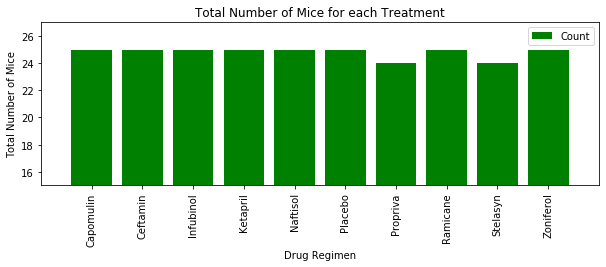

In [31]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

number = total_mice.values
#print(number)

# Set x axis and tick locations
x_axis = np.arange(len(number))
drug_regimen = total_mice.index
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(10,3))
plt.bar(x_axis, number, color='green', alpha=1, align="center", label = 'Count')
plt.xticks(tick_locations, drug_regimen, rotation="vertical")

# Set x and y limits
plt.xlim(-1, len(x_axis))
plt.ylim(15, max(number)+2)

# Set a Title and labels
plt.legend()
plt.title("Total Number of Mice for each Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Mice")
plt.show()


Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64


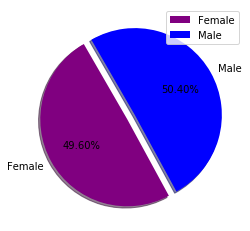

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender = cleaned_dataframe.groupby("Sex")['Mouse ID'].nunique()
print(gender)
gender.plot(kind='pie', autopct='%1.2f%%', explode=[0.1,0], colors=['purple','blue'], shadow=True, startangle=120, legend=True)
plt.ylabel ('')
plt.show()


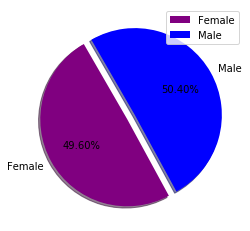

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender2 = gender
#print(gender2)
labels = gender.index
plt.pie(gender2, autopct='%1.2f%%',labels=labels, explode=[0.1,0], colors=['purple','blue'], shadow=True, startangle=120)
plt.legend()
plt.show()


## Quartiles, Outliers and Boxplots

In [34]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

final_volume = cleaned_dataframe.groupby(['Mouse ID', 'Drug Regimen']).agg(Timepoint = ('Timepoint', 'max'))
final_volume2 = final_volume.merge(cleaned_dataframe, how = 'inner', on = ['Mouse ID', 'Timepoint'])
final_volume2


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [35]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
#treatment

# Create empty list to fill with tumor vol data (for plotting)
empty_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for value in treatment:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = final_volume2['Tumor Volume (mm3)'].loc[final_volume2['Drug Regimen'] == value]
    #print(tumor_volume)
    
    # add subset 
    empty_list.append(tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"For {value} the interquartile range is: {iqr}")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"For {value} values below {lower_bound} could be outliers.")
    print(f"For {value} values above {upper_bound} could be outliers.\n")
    

For Capomulin the interquartile range is: 7.781863460000004
For Capomulin values below 20.70456164999999 could be outliers.
For Capomulin values above 51.83201549 could be outliers.

For Ramicane the interquartile range is: 9.098536719999998
For Ramicane values below 17.912664470000003 could be outliers.
For Ramicane values above 54.30681135 could be outliers.

For Infubinol the interquartile range is: 11.477135160000003
For Infubinol values below 36.83290494999999 could be outliers.
For Infubinol values above 82.74144559000001 could be outliers.

For Ceftamin the interquartile range is: 15.577752179999997
For Ceftamin values below 25.355449580000002 could be outliers.
For Ceftamin values above 87.66645829999999 could be outliers.



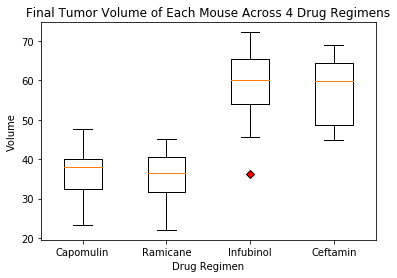

In [36]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

red_diamond = dict(markerfacecolor='r', marker='D')
fig, ax = plt.subplots()
ax.set_title('Final Tumor Volume of Each Mouse Across 4 Drug Regimens')
ax.set_ylabel('Volume')
ax.boxplot(empty_list, flierprops=red_diamond)
ax.set_xticklabels(treatment)
ax.set_xlabel('Drug Regimen')
plt.show()


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

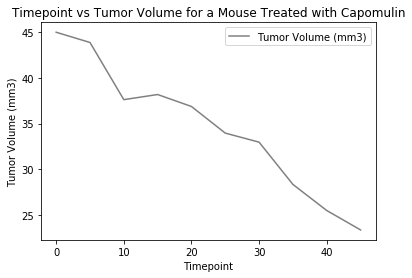

In [40]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

lineplot = cleaned_dataframe.loc[(cleaned_dataframe['Mouse ID'] == 's185')]
lineplot.plot(x='Timepoint',y='Tumor Volume (mm3)', color="gray")
plt.title("Timepoint vs Tumor Volume for a Mouse Treated with Capomulin")
plt.ylabel('Tumor Volume (mm3)')


Text(0.5, 0, 'Weight (g)')

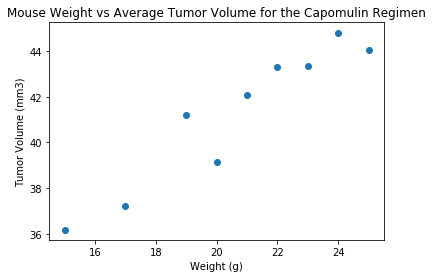

In [41]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin = cleaned_dataframe.loc[cleaned_dataframe['Drug Regimen'] == 'Capomulin']
avg_capomulin = capomulin.groupby(['Weight (g)']).mean()
avg_capomulin = avg_capomulin.reset_index()
#avg_capomulin
plt.scatter(avg_capomulin['Weight (g)'],avg_capomulin['Tumor Volume (mm3)'])
plt.title("Mouse Weight vs Average Tumor Volume for the Capomulin Regimen")
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Weight (g)')


## Correlation and Regression

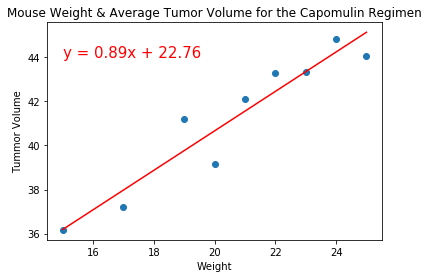

In [42]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = avg_capomulin['Weight (g)']
y_values = avg_capomulin['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,44),fontsize=15,color="red")
plt.xlabel('Weight')
plt.ylabel('Tummor Volume')
plt.title('Mouse Weight & Average Tumor Volume for the Capomulin Regimen')
plt.show()